In [2]:
from google.colab import files
uploaded = files.upload()

Saving garments_worker_productivity.csv to garments_worker_productivity.csv


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("garments_worker_productivity.csv")

df.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


Производительность работника одежды.

In [8]:
df.shape

(1197, 15)

In [9]:
15 столбцов и 1197 строк

SyntaxError: invalid syntax (<ipython-input-9-f5a306621d6a>, line 1)

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

столбец wip содержит 506 пустых **значений**

<ipython-input-11-779a79dab2b6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), center=0, annot = True)


Text(0.5, 1.0, '')

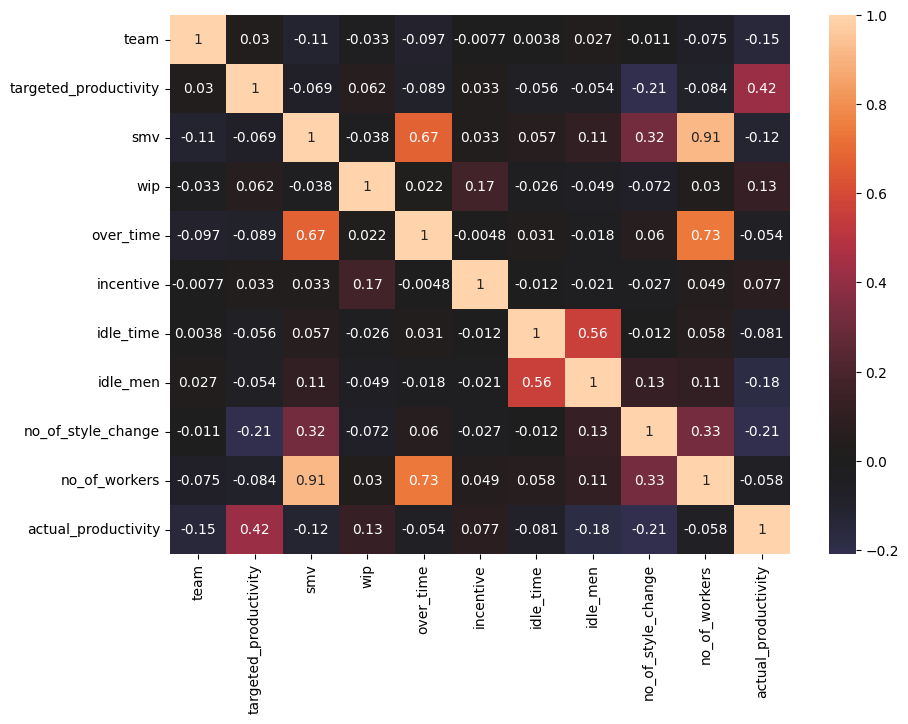

In [11]:

#матрица корреляции
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), center=0, annot = True)

plt.title('', fontsize=10)

### Переменные имеют высокую или среднюю корелляцию: Over_time  и smv, no_of_workers and smv, no_of_workers and over_time, остальные переменные кореллируют слабо

<Axes: title={'center': 'actual_productivity'}, ylabel='actual_productivity'>

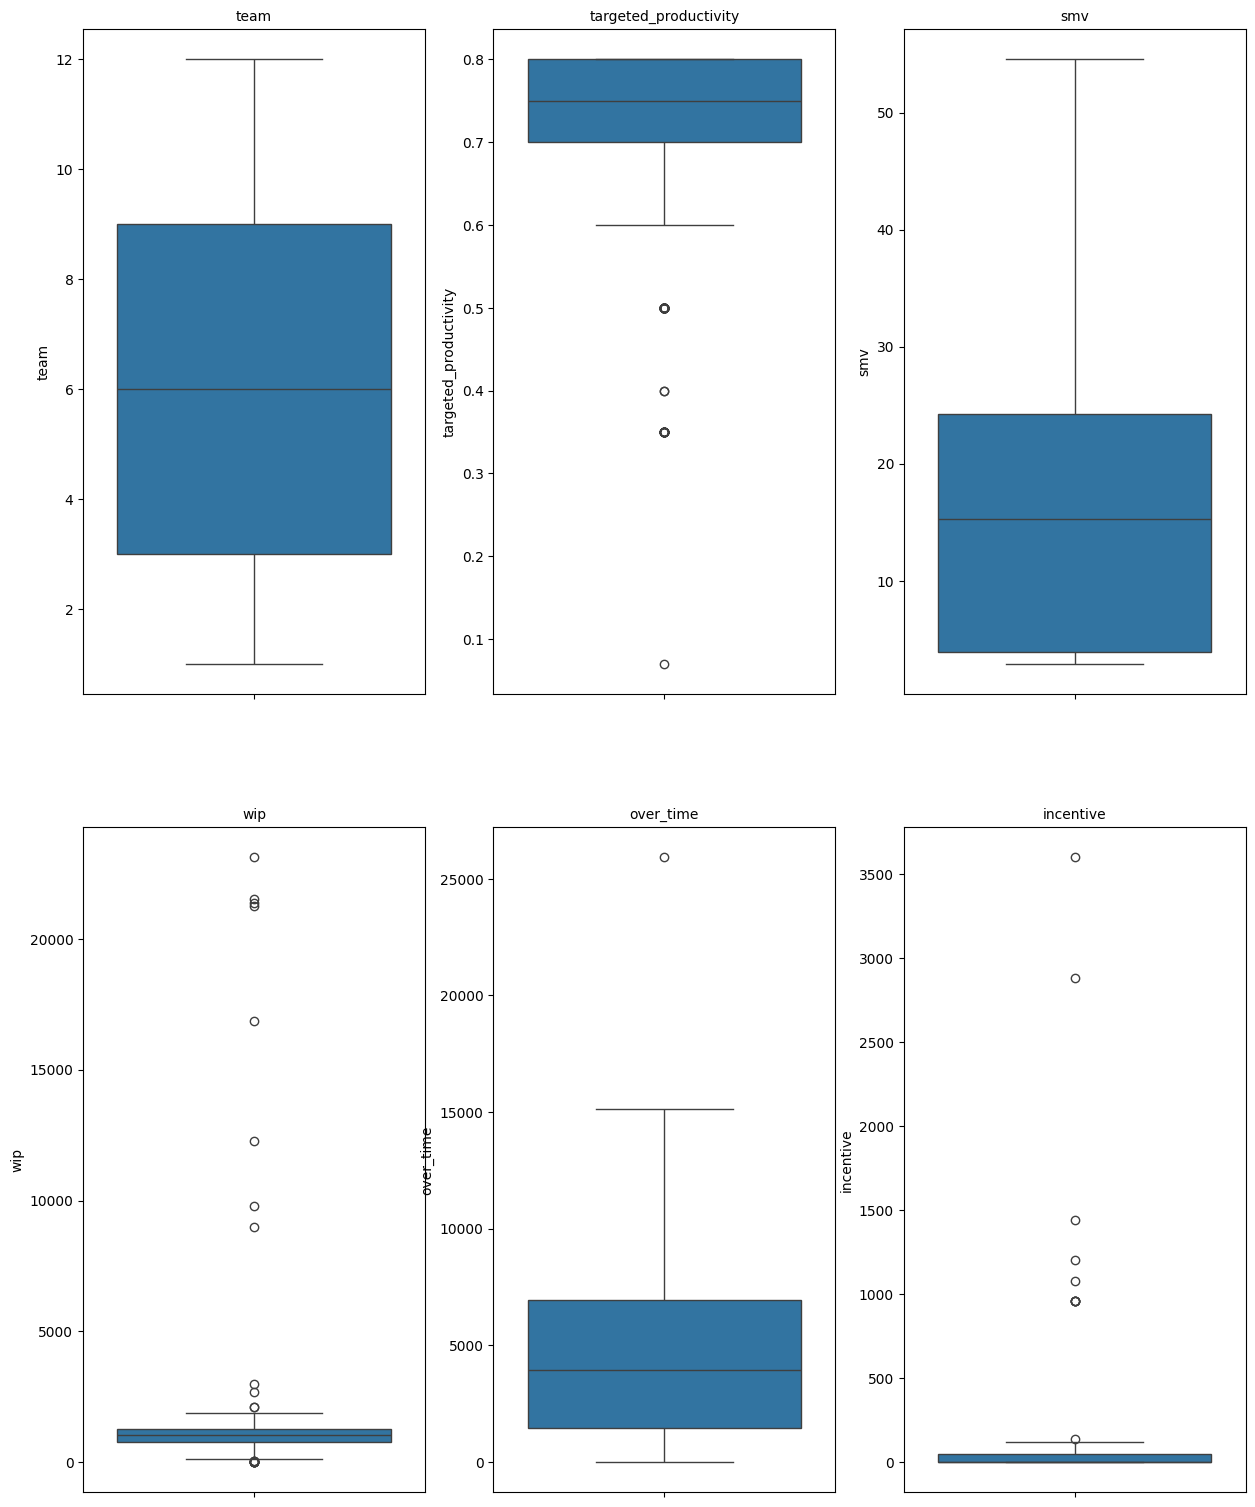

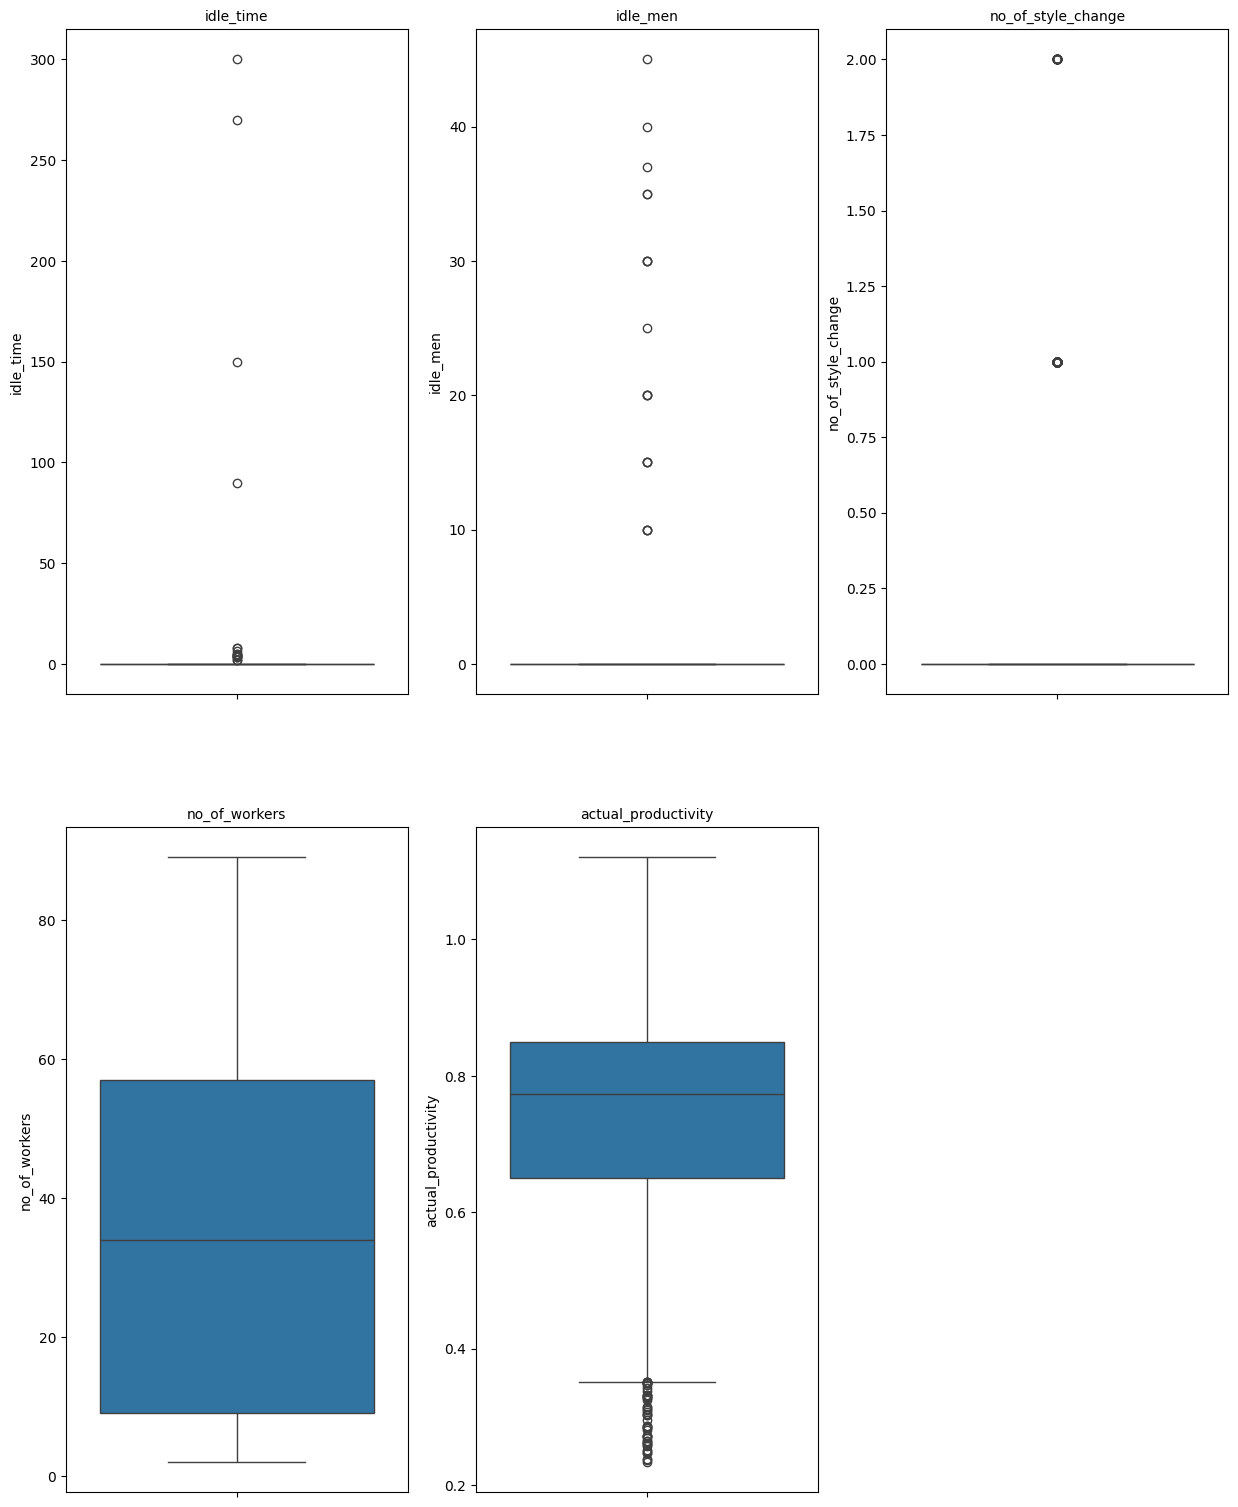

In [12]:

plt.figure(figsize=(15, 19))

plt.subplot(231)
plt.title('team', fontsize=10)
sns.boxplot(df["team"])

plt.subplot(232)
plt.title('targeted_productivity', fontsize=10)
sns.boxplot(df["targeted_productivity"])

plt.subplot(233)
plt.title('smv', fontsize=10)
sns.boxplot(df["smv"])

plt.subplot(234)
plt.title('wip', fontsize=10)
sns.boxplot(df["wip"])

plt.subplot(235)
plt.title('over_time', fontsize=10)
sns.boxplot(df["over_time"])

plt.subplot(236)
plt.title('incentive', fontsize=10)
sns.boxplot(df["incentive"])

plt.figure(figsize=(15, 19))
plt.subplot(231)
plt.title('idle_time', fontsize=10)
sns.boxplot(df["idle_time"])

plt.subplot(232)
plt.title('idle_men', fontsize=10)
sns.boxplot(df["idle_men"])

plt.subplot(233)
plt.title('no_of_style_change', fontsize=10)
sns.boxplot(df["no_of_style_change"])

plt.subplot(234)
plt.title('no_of_workers', fontsize=10)
sns.boxplot(df["no_of_workers"])

plt.subplot(235)
plt.title('actual_productivity', fontsize=10)
sns.boxplot(df["actual_productivity"])

в столбцах smv, no_of_workers, team нет выбросов

### Задание 2

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
y = np.array(df['actual_productivity'])
y

array([0.94072542, 0.8865    , 0.80057049, ..., 0.625625  , 0.50588889,
       0.39472222])

In [28]:
from sklearn.model_selection import train_test_split
x=df[['team', 'smv', 'no_of_workers']]
y=df['actual_productivity']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (837, 3), (837,)
Test dataset size: (360, 3), (360,)


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
w0 = model.intercept_
w0

0.8107381580590745

In [30]:
w1 = model.coef_
w1

array([-0.00967001, -0.0067189 ,  0.00258085])

In [31]:
y_pred = model.predict(X_test)

In [32]:
l = (y_test - y_pred)**2
MSE_vruch = sum(l)/len(l)
MSE_vruch

0.02754042105590271

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.12718995886110265
Mean Squared Error: 0.02754042105590271
R2 score: 0.05710460599587608


метрики mse и mae говорят, что модель обучилась хорошо, но R2 не очень хорошая

Средняя абсолютная ошибка - mae = (реальное знач - прогрнозируемое)/(число наблюдений)

средний квадрат ошибки - mse = (реальное знач - прогрнозируемое)**2/(число наблюдений)

коэфифицент детерминации - r2 - разница между выборками в наборе данных и прогнозами, сделанными моделью
### Новый раздел

In [34]:
features =  X_train.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_df['features'] = features

print(coeff_df.sort_values(by='Coefficient'))
print('y=', end="")

for i in range(coeff_df.shape[0]):
    print(f'\'{coeff_df["features"][i]}\'*{round(coeff_df["Coefficient"][i], 2)}', end="")
    if i < 3:
        print(" + ", end="")

print(f' + {model.intercept_}')

   Coefficient       features
0    -0.009670           team
1    -0.006719            smv
2     0.002581  no_of_workers
y='team'*-0.01 + 'smv'*-0.01 + 'no_of_workers'*0.0 +  + 0.8107381580590745


значимые коэф.: over_time, smv, no_of_workers

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


mmsc = MinMaxScaler()
x_norm = mmsc.fit_transform(X_train)
x_norm_test = mmsc.fit_transform(X_test)

print(f'Train dataset size: {x_norm.shape}, {y_train.shape}')
print(f'Test dataset size: {x_norm_test.shape}, {y_test.shape}')

model = LinearRegression()
model.fit(x_norm, y_train)

print('Веса всех признаков (w1, ..., w13): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Train dataset size: (837, 3), (837,)
Test dataset size: (360, 3), (360,)
Веса всех признаков (w1, ..., w13):  [-0.10637012 -0.3224398   0.22453359]
Свободный коэффицент уравнения w0: 0.786745042035317


In [36]:
y_pred = model.predict(x_norm_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

MAE: 0.13308720003572821
MSE: 0.03224632583219802
R2 score: -0.10401043030600499


после нормализации точность ухудшилась(R2 отрицательный, что плохо)

In [37]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
x_stan = stand.fit_transform(X_train)
x_stan_test = stand.fit_transform(X_test)
print(f'Train dataset size: {x_stan.shape}, {y_train.shape}')
print(f'Test dataset size: {x_stan_test.shape}, {y_test.shape}')

model = LinearRegression()
model.fit(x_stan, y_train)
y_pred = model.predict(x_stan_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Train dataset size: (837, 3), (837,)
Test dataset size: (360, 3), (360,)
MAE: 0.12697301914810152
MSE: 0.027696134228282758
R2 score: 0.05177348804655735


### изменений практически нет


### Во время нормализации значения сдвигаются и изменяются в размере, так что они оказываются в диапазоне от 0 до 1. Метод стандартизации сначала вычитает среднее значение, а затем делит его на стандартное отклонение, так что результирующее распределение функций имеет среднее значение как 0 и стандартное отклонение – 1.

xnorm=(x-xmin)/(xmax-xmin)
xstand=(x-ср знач)/станд отклон